<img src="./01/logo-insa.png" style="float:right; max-width: 60px; display: inline" alt="INSA" /></a>

# Analysis of sizing scenarios at vehicle level

*Written by Marc Budinger and Yann Bocquet, INSA Toulouse, France*

The objective of this notebook is:
- to set up the typical vehicle use mission profiles
- analyze these temporal effort / speed profiles in power plans or using equivalent indicators and a vehicle mechanical model.

### 1. Mission profiles

#### 1.1. European driving cycles
It exists several European driving cycles which are supposed to represent the typical usage of cars in Europe ([link](http://www.unece.org/fileadmin/DAM/trans/main/wp29/wp29regs/r101r2e.pdf)). The New Urban Cycle [NECD](https://en.wikipedia.org/wiki/New_European_Driving_Cycle) is shown below.

<Figure size 432x288 with 0 Axes>

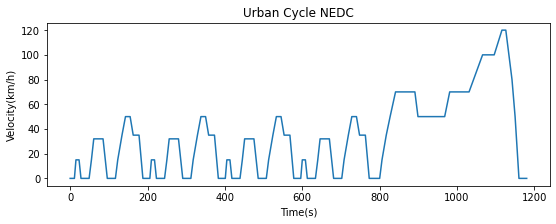

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

dfNEDC = pd.read_csv('02/NEDC.csv', sep=';')

plt.figure()
plt.figure(figsize=(9, 3))

plt.plot(dfNEDC["Time(s)"], dfNEDC["Velocity(km/h)"])
plt.xlabel("Time(s)")
plt.ylabel("Velocity(km/h)")
plt.title("Urban Cycle NEDC")

plt.show()

These cycles were designed to assess the emission levels of car engines and fuel economy in passenger cars. They are criticized for their inability to represent real-life driving. Both cycles are not realistic because of the following points : 
- little speed fluctuations
- low accelerations 
- low speed
- no slope

#### 1.2. Real cycles of commercial vehicles

To represent more accuratly the typical usage of the chosen vehicle, we will instead use 2 real cycles of 3.5T commercial vehicles. The 2 cycles are shown below.  

<Figure size 432x288 with 0 Axes>

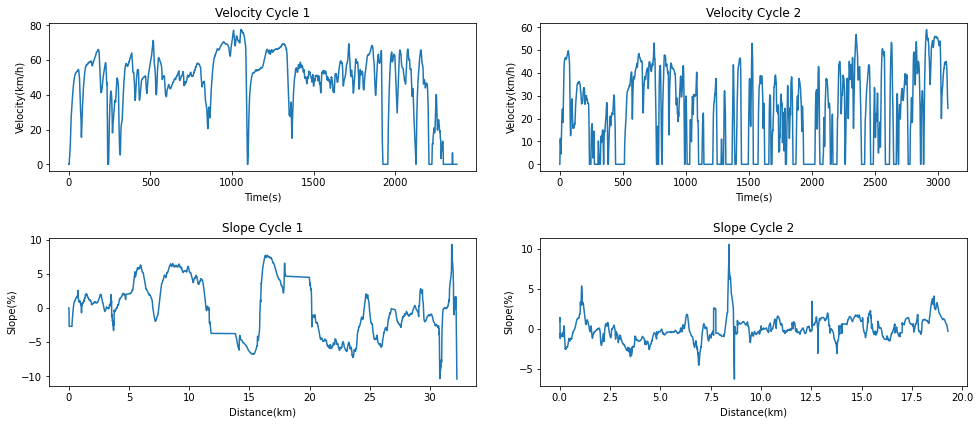

Max time cycle 1 : 2378 s
Max time cycle 2 : 3080 s


In [4]:
import pandas as pd 
import matplotlib.pyplot as plt

df1 = pd.read_excel('02/Cycle1.xlsx')
df2 = pd.read_excel('02/Cycle2.xlsx')

#Cycle1
t1 = df1["Time (s)"][:]
v1 = df1["Vehicle Speed (km/h)"][:]
d1 = df1["distance (km)"][:]
s1 = df1["slope (%)"][:]

#Cycle2
t2 = df2["Time (s)"][:]
v2 = df2["Vehicle Speed (km/h)"][:]
d2 = df2["distance (km)"][:]
s2 = df2["slope (%)"][:]

#Plot
plt.figure()
plt.figure(figsize=(15, 6))

plt.subplot(221)
plt.plot(t1,v1)
plt.xlabel("Time(s)")
plt.ylabel("Velocity(km/h)")
plt.title("Velocity Cycle 1")

plt.subplot(222)
plt.plot(t2,v2)
plt.xlabel("Time(s)")
plt.ylabel("Velocity(km/h)")
plt.title("Velocity Cycle 2")

plt.subplot(223)
plt.plot(d1,s1)
plt.xlabel("Distance(km)")
plt.ylabel("Slope(%)")
plt.title("Slope Cycle 1")

plt.subplot(224)
plt.plot(d2,s2)
plt.xlabel("Distance(km)")
plt.ylabel("Slope(%)")
plt.title("Slope Cycle 2")

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.15)
plt.show()

print("Max time cycle 1 : %.0f s"%max(t1))
print("Max time cycle 2 : %.0f s"%max(t2))

### 2. Vehicle sizing scenarios: force/speed mission profiles

#### 2.1. Sizing scenarios equations

We have chosen to model here an electric version of the widely spread [Daily IVECO Van Euro 6](https://www.iveco.com/DailyBusiness/img/doc/BTS_L1612301MASTER_05-16.pdf). The geometrical characteristics are kept but the electric version is assumed to be 1000kg heavier. The parameters used for the modeling are listed below :
- Mass with loading and passengers $M = 4500 kg$
- Frontal Surface $S = 4 m^2 (\approx 2*2)$ 
- [Drag coefficient](https://www.iveco.com/en-us/press-room/release/Pages/new-daily-van-of-the-year-2015.aspx) $C_x = 0.316$
- [Rolling coefficient](https://www.iveco.com/belgium-nl/Documents/Configurator/Brochure/Dailyvan_BE_nl.pdf) (page 30) $C_{rr} = 0.008$ with [reference table](https://eur-lex.europa.eu/eli/reg/2009/1222/oj) for tyre labels.

> **Question:** recall the equations used to determine the forces and power to be provided by the engine in order to take into account the aerodynamic, rolling, slope and inertial effects.

#### 2.2. Force/speed mission profiles

> **Question:** Set up a Modelica model in order to calculate force vehicle along a mission profile. Draw force and speed profiles of the differents cycles in temporal. Copy them into an excel file. 

### 3. Analysis of Real Cycles
We can compare the 3 cycles on several criteria which have a direct impact on the sizing of the components of the traction chain :
- Maximum Velocity $v_{max}$ $\rightarrow$ Motor
- Maximum acceleration $a_{max}$ $\rightarrow$ Motor and Battery
- Maximum Instantaneous Power $P_{max}$ $\rightarrow$ Battery
- Coin Power $P_{Coin}=F_{max}.v_{max}$ $\rightarrow$ Inverter
- Mean Force $F_{RMS}=\sqrt{\frac{1}{T}\int_{0}^{T} F^2 dt}$ $\rightarrow$ Motor
- Energy Range $E_{max}-E_{min}$ $\rightarrow$ Battery

> **Questions:** Compute thanks Modelica or Excel these indicators. Draw also a power diagram (Force vs speed) and represent max force and max power limits. Analyse these indicators and diagrams.